CIFAR10 DATASET PREDICTION.

In [1]:
# Step 1. Import Tensorflow and other helper libraries

# make sure tensorflow is installed; uncomment the line before if you need to
# pip install tensorflow

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models  #this is a new dependency!

In [2]:
# Step 2. Load the CIFAR-10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Step 3. Pre-process and Explore the data

# Pre-process the data: convert pixel intensities to double values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Write code to check the data has the correct shape/dimension
# Insert your code below
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
# Step 4. Build the tf.keras.Sequential model by stacking layers.

# A. Create an "empty" sequential model and then add layers, one by one
# B. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 5 by 5
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the same as the size of each of the images in the data set
# C. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 1
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:
model=models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2),strides=1))

In [5]:
# Step 5. Add more layers.

# A. Add a Conv2D layer with the following characteristics:
#      - 32 output filters
#      - each of size 3 by 3
#      - use the Rectified Linear Unit as a non-linear activation function
#      - no padding
#      - the input shape is the size of the output shape from the last maxpooling layer
# B. Add a maxpooling layer with the following characteristics:
#      - pool size is 2 by 2
#      - stride is 2
#      - no padding

# Don't add any flatten or fulley connected layers at the end!

# Insert your code below:

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(14,14,32)))
model.add(layers.MaxPooling2D((2,2),strides=2))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
Total params: 11680 (45.62 KB)
Trainable params: 11680 (45.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [8]:
model.add(layers.Conv2D(64, (3,3), activation='softmax'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))# last layer should be the size of the output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 6400)              0

In [9]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.01200613, -0.00916158, -0.00709409,  0.00519912,  0.00513333,
         0.02518914,  0.02269363, -0.00885525,  0.01299282,  0.02449097]],
      dtype=float32)

In [10]:
# Use the tf.nn.softmax function to convert these logits into "probabilities" for each class:
tf.nn.softmax(predictions).numpy()


array([[0.10036711, 0.0982649 , 0.09846827, 0.09968623, 0.09967967,
        0.10169901, 0.10144554, 0.09829501, 0.10046619, 0.10162803]],
      dtype=float32)

In [11]:
# Choose an optimizer and loss function for training

# Deep learning neural networks are trained using the stochastic gradient descent optimization
# algorithm. As part of the optimization algorithm, the error for the current state of the
# model must be estimated repeatedly. This requires the choice of an error function,
# conventionally called a loss function, that can be used to estimate the loss of the model so
# that the weights can be updated to reduce the loss on the next evaluation.

# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and
# returns a scalar loss for each example.

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This loss is equal to the negative log probability of the true class: It is zero if the model
# is sure of the correct class. This untrained model gives probabilities close to random
# (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

loss_fn(y_train[:1], predictions).numpy()

2.2882333

In [12]:
# Step 6: Ready to compile!
# optimizer parameter = 'adam'. Other optimizer options here:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
# loss = the name of the loss function
# Typically you will use metrics=['accuracy']
model.compile(optimizer='RMSProp', loss=loss_fn, metrics=['accuracy'])

# Task: call the model.fit method to train the model for 10 iterations

# Insert your code below:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 1.7534 - accuracy: 0.3585 - val_loss: 1.4885 - val_accuracy: 0.4499
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3856 - accuracy: 0.5030 - val_loss: 1.3568 - val_accuracy: 0.5186
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2293 - accuracy: 0.5617 - val_loss: 1.2832 - val_accuracy: 0.5394
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1081 - accuracy: 0.6099 - val_loss: 1.1901 - val_accuracy: 0.5846
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0054 - accuracy: 0.6488 - val_loss: 1.1655 - val_accuracy: 0.6016
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9273 - accuracy: 0.6772 - val_loss: 1.1213 - val_accuracy: 0.6196
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8553 - accuracy: 0.7029 - val_loss: 1.0467 - val_accurac

In [13]:
# Step 7a. Evaluate the model: compare how the model performs on the test dataset

# The Model.evaluate method checks the models performance, usually on a "Validation-set"
# or "Test-set".

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.0921 - accuracy: 0.6556 - 767ms/epoch - 2ms/step

Test accuracy: 0.6556000113487244


313/313 - 1s - loss: 1.0921 - accuracy: 0.6556 - 841ms/epoch - 3ms/step


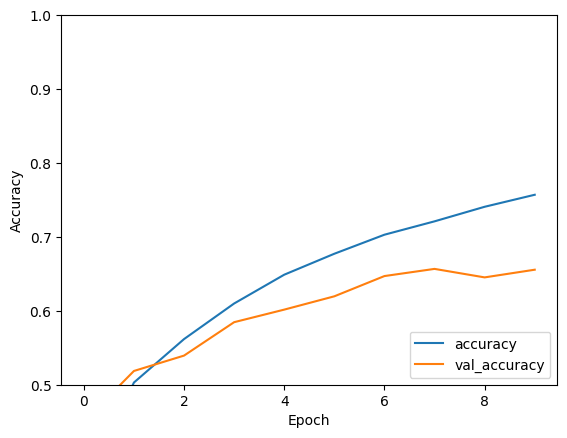

In [14]:
# 7b. Plot training vs testing accuracy

#history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [15]:
# 8. Make predictions

# If you want your model to return a probability, you can wrap the trained model, and attach
# the softmax classifier to it:

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10])# test the first 10 images
#print(predictions.shape)
predictions[0]

1/1 [==============================] - 0s 170ms/step


array([0.0342227 , 0.0051266 , 0.03331935, 0.40196398, 0.00277665,
       0.18315189, 0.10246476, 0.02496682, 0.20374942, 0.00825785],
      dtype=float32)

In [16]:
# Apply a label and compare with the test label

print(np.argmax(predictions, axis = 1))
print(y_test[:10])


[3 8 8 0 4 6 1 4 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


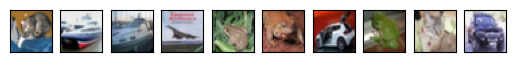

In [17]:
# View the first five images, to check the validity of the labels
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
#plt.xlabel(class_names[y_test[i][0]])
plt.show()